<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

**Изучение общей информации**

<font color='blue'> Примечание: блок "изучение данных из файла" отчасти будет содержать элементы предобработки данных. Мне показалось логичнее и удобнее анализировать данные постепенно по столбикам. Отчасти здесь я постараюсь: 
<div>
    - определить и изучить пропущенные значения: предположу о наличии логичных замен для значений, предположу о причинах, которые могли привести к пропускам в данных
<div>
    - пояснить, в каких столбцах нужно изменить тип данных и почему
<div>
    - кое-где даже сделать операции по предобработке данных
    
Следующий раздел ("Предобработка данных") больше будет содержать именно код, а не умозаключения.
</font> 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
data1 = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Всего - 23699 значений.

**Число фотографий квартиры в объявлении**

In [2]:
data['total_images'].value_counts().sort_index()

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

Значения количества комнат от 0 до 50. На первый взгляд, данные этого столбца не содержат аномальных значений.
</div>

Что нужно сделать с данными данного столбца?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Приводить данные к другому типу не нужно.



**Цена на момент снятия с публикации**

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


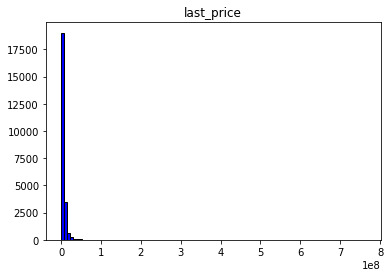

In [3]:
#data['last_price'].value_counts().sort_index()
import matplotlib.pyplot as plt
import numpy as np 
print(data['last_price'].describe())
plt.hist(data['last_price'], color = 'blue', edgecolor = 'black', bins=100)
plt.title('last_price')
plt.xlabel('')
plt.ylabel('')
plt.show()

Цена на момент снятия варируется от 12190 тыс.р. (возможно, аномальное значение) до 763000000 (цена самое то для 19 комнатной квартиры).

Что нужно сделать с данными?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Необходимо привести данные к типу int64, так как нет смысла иметь данны по стоимости квартир в типе float64: 0 после запятой особой погоды не сыграет, а вычисления с целочисленным типом проводить удобнее.

In [4]:
data['last_price'] = data['last_price'].astype('int64') #перевод данных в тип int64
#data.info()

**Площадь квартиры в квадратных метрах (м²)**

In [5]:
#data['total_area'].value_counts().sort_index()
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Значения площади квартиры варьируются от 12 до 900 м². На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Приводить данные к типу int64 не стоит, так как может потеряться десятая часть метра (если в дальнейшем как-то высчитывать цену за квадратный метр, то это может повлиять на точность расчетов).

**Дата публикации**

In [6]:
data['first_day_exposition'].value_counts().sort_index()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
#data.info()

Временной промежуток публикаций от 27.11.2014 до 03.05.2019. Примерно 4,5 года.

Что нужно сделать с данными?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Необходимо перевести данные из типа object в datetime64[ns], дабы они соответствовали содержанию столбца.

**Число комнат**

In [7]:
data['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Диапазон значений количества комнат от 0 до 19. 0 комнат может означать то, что продается не квартира, а комната, или квартира-студия. На первый взгляд, данные этого столбца не содержат аномальных значений. Но необходимо проверить достоверность данных о квартире с 19 комнатами.

Что нужно сделать с данными?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Переводить данные в другой тип не нужно.

In [8]:
print(data.loc[data['rooms'] == 19])
print(data.loc[data['rooms'] == 19]['total_area'] / data.loc[data['rooms'] == 19]['rooms'])
print(data.loc[data['rooms'] == 19]['locality_name'])
print(data.loc[data['rooms'] == 19]['kitchen_area'])

       total_images  last_price  total_area first_day_exposition  rooms  \
14498             6    32250000       374.6           2018-06-09     19   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
14498             NaN           5.0        264.5      2          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
14498          27.6      NaN  Санкт-Петербург           19497.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
14498              3574.0               0.0            NaN               2.0   

       ponds_nearest  days_exposition  
14498          548.0            114.0  

[1 rows x 22 columns]
14498    19.715789
dtype: float64
14498    Санкт-Петербург
Name: locality_name, dtype: object
14498    27.6
Name: kitchen_area, dtype: float64


**Высота потолков (м)**

In [9]:
data['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

Диапазон значений высоты потолков в метрах от 1 до 100. Вероятно, с обоих концов есть аномальные значения.

Что нужно сделать с данными?

1) Отсутствующие и пропущеные значения имеются. Их гораздо легче будет заполнить, сузив выборку по центру СПБ в последнем пункте исследовательского анализа данных.

2) Пропуски нужно заполнить. По моему мнению, заполять пропуски целесообразно при анализе узкого сегмента квартир в последнем пункте исследовательского анализа данных. До этого момента нам эти данные не понадобятся, а отбрасывание аномальных значений может повлиять на дальнейшие анализы.

3) Переводить данные в целочисленный тип не стоит, так как это может повлиять на дальнейшую стоимость расчетов.


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['ceiling_height'].value_counts().sort_index())


1.00         1
1.20         1
1.75         1
2.00        11
2.20         1
2.25         1
2.30         4
2.34         1
2.40        23
2.45        15
2.46         2
2.47         3
2.48         8
2.49         1
2.50      3515
2.51        34
2.52        79
2.53        67
2.54        83
2.55       980
2.56       139
2.57       103
2.58        63
2.59        14
2.60      1646
2.61         5
2.62        14
2.63        13
2.64        81
2.65       676
2.66        17
2.67        36
2.68        23
2.69         2
2.70      1574
2.71        13
2.72        31
2.73        35
2.74        28
2.75       910
2.76        60
2.77        61
2.78        51
2.79        10
2.80       993
2.81         9
2.82        18
2.83        15
2.84        19
2.85       101
2.86         6
2.87        10
2.88        12
2.89         1
2.90       164
2.91         4
2.92         9
2.93         4
2.94         3
2.95        47
2.96         5
2.97         4
2.98         2
2.99         1
3.00      1112
3.01         6
3.02      

**Всего этажей в доме**

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


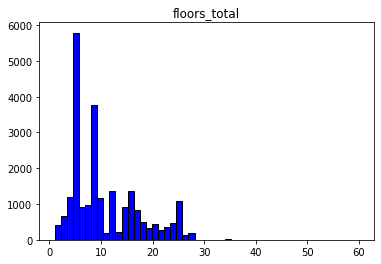

In [11]:
#data['floors_total'].value_counts().sort_index()\
print(data['floors_total'].describe())
plt.hist(data['floors_total'], color = 'blue', edgecolor = 'black', bins=50)
plt.title('floors_total')
plt.xlabel('')
plt.ylabel('')
plt.show()

Диапазон значений количества этажей в зданиях - от 1 до 60 (по моим данным, в Санкт-Петербурге и его окрестностях есть и высотные здания, и одноэтажные частные дома). На первый взгляд, данные этого столбца не содержат аномальных значений.

1) Отсутствующие и пропущеные значения имеются. Радует, что их немного! 

2) Пропуски нужно заполнить. Посмотрим на разброс данных: значения от 2 до 27 этажей распределены ПРИМЕРНО равномерно, то есть, имеется больше 100 домов в каждой категории. Ниже выведена таблица сравнения этажей, на котором расположена квартира с максимальным количеством этажей (значения NaN). Мы не можем из этого узнать сколько этажей в доме, в котором продается квартира, известно лишь то, что их количество больше или равно этажу, на котором расположена квартира и то, что сама общая картина данных, если мы заменим значения NaN в столбце floors_total на floor не поменяется (значений мало с пропусками в этом столбце). Так и сделаем ниже. 

3) Переводить данные в целочисленный тип стоит, не бывает же половины этажа. Так будут визуально приятнее смотреться данные.

In [12]:
data.loc[data['floors_total'].isnull(), ['floors_total', 'floor']].head(50)
data['floors_total'] = data['floors_total'].fillna(data['floor'])

data['floors_total'] = data['floors_total'].astype('int64') #перевод данных в тип int64
#data.info()
#data['floors_total'].value_counts().sort_index()

**Жилая площадь в квадратных метрах (м²)**

In [13]:
data['living_area'].value_counts().sort_index()

2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64

Диапазон значений жилой площади варьируется от 2 м² до 409.7 м². Бытовку с жилой площадью 2 м² можно продать через агентство недвижимости так же успешно, как и многоуровневый особняк. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущеные значения есть. Их достаточно много!

2) Пропуски заполнять не нужно. По какому принципу? Один из немногих вариантов заполнения пропусков - заполнить жилую площадь значениями, равными общей площади квартиры: они примерно равны и коррелируют между собой.

3) Приводить данные к типу int64 не стоит, так как может потеряться десятая часть метра.

In [14]:
#data['living_area'] = data['living_area'].fillna(data['total_area'])
#data.info()

**Этаж**

In [15]:
data['floor'].value_counts().sort_index()

1     2917
2     3368
3     3073
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
11     523
12     526
13     379
14     337
15     343
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      46
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

Диапазон значений этажей, на котором расположена продающаяся квартира составляет от 1 до 33. На первый взгляд, данные этого столбца не содержат аномальных значений. (максимальное число этажей в здании, в котором продается квартира 60 и это больше максимального значения данной выборки)

Что нужно сделать с данными данного столбца?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Приводить данные к другому типу не нужно.

**Апартаменты (булев тип)**

In [16]:
data['is_apartment'].value_counts().sort_index()

False    2725
True       50
Name: is_apartment, dtype: int64

Булев тип. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Есть отсутствующие и пропущенные значения.

2) Желательно заполнить пропуски: можно их заполнить по принципу, ексли не указано, что квартира принадлежит к категории апартаменты, значит она к ней не принадлежит.

3) Приводить данные к другому типу не нужно.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#data.info()

**Квартира-студия (булев тип)**

In [18]:
data['studio'].value_counts().sort_index()

False    23550
True       149
Name: studio, dtype: int64

Булев тип. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Приводить данные к другому типу не нужно.

**Свободная планировка (булев тип)**

In [19]:
data['open_plan'].value_counts().sort_index()

False    23632
True        67
Name: open_plan, dtype: int64

Булев тип. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующих и пропущеных значений нет.

2) Пропуски заполнять не нужно.

3) Приводить данные к другому типу не нужно.

**Площадь кухни в квадратных метрах (м²)**

In [20]:
data['kitchen_area'].value_counts().sort_index()

1.30      1
2.00      7
2.30      1
2.40      1
2.89      1
         ..
93.20     1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64

Диапазон значений площади кухни от 1.30 м² до 112 м². В квартире-студии вполне может быть кухонная зона размером 1.30 м², а для квартиры площадью 900 м² иметь кухню в 112.00 м² это нормально. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Пропуски необходимо заполнить. Мы их заполним средним значением относительно соотношения площадей кухни к общей площади квартиры в тех квартирах, где у нас значения есть. Высчитаем среднюю долю площади всей квартиры, занимаемой кухней и умножим это число на площадь квартиры с недостающими данными. Итого мы получим примерную площадь кухни.

3) Приводить данные к другому типу не нужно.

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ((data['kitchen_area'] / data['total_area']).mean()))
data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

**Число балконов**

In [22]:
data['balcony'].value_counts().sort_index()

0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

Диапазон значений от 1 до 5. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Пропуски необходимо заполнить. Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

3) Для удобства данные необходимо привести к типу int64.

In [23]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')
#data.info()

**Название населённого пункта**

In [24]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].value_counts().sort_values()

деревня иссад                     1
посёлок ропша                     1
посёлок сумино                    1
садовое товарищество садко        1
деревня раздолье                  1
                              ...  
пушкин                          369
всеволожск                      398
посёлок шушары                  440
посёлок мурино                  522
санкт-петербург               15721
Name: locality_name, Length: 364, dtype: int64

На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть. 

2) Логичную замену пропускам мы подобрать не можем, итого придется оставить все как есть.

3) Приводить данные к другому типу не нужно.

**Расстояние до ближайшего аэропорта в метрах (м)**

In [25]:
data['airports_nearest'].value_counts().sort_index()

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8275, dtype: int64

В случае первого значения: либо данные не были определены, либо это квартира авиадиспетчера: данные необходимо обработать для последующего анализа.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Логичную замену пропускам мы подобрать не можем, итого придется оставить все как есть.

3) Приводить данные к другому типу не нужно.


**Расстояние до центра города (м)**

In [26]:
data['cityCenters_nearest'].value_counts().sort_index()

181.0      1
208.0      1
215.0      1
287.0      1
291.0      1
          ..
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: cityCenters_nearest, Length: 7642, dtype: int64

Если брать, что дано расстояние до центра Санкт-Петербурга, то значение в почти 66 км может иметь место быть. Не нужно забывать, что в выборке дана в том числе и информация о жилье в поселках, деревнях, ПГТ и прочих населенных пунктах, где в расчете расстояния может быть дано расстояние до центра близлежащего города. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Логичную замену пропускам мы подобрать не можем, итого придется оставить все как есть.

3) Приводить данные к типу int64 можно, но сложно, так как не обработаны пропущенные значения.

**Число парков в радиусе 3 км**

In [27]:
data['parks_around3000'].value_counts().sort_index()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Диапазон значений от 0 до 3. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Логичную замену пропускам мы подобрать можем: предположим, что если значений нет, значит вблизи 3000 метров парков нет.

3) Приводить данные к типу int64 можно дабы данные смотрелись приятнее.

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int64')
#data.info()

**Расстояние до ближайшего парка (м)**

In [29]:
data['parks_nearest'].value_counts().sort_index()

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 995, dtype: int64

По данным предыдущего столбца, расстояние больше 3000 м может быть у 10106 объектов. Вероятно, если значения этого расстояния нет, значит значение больше 3000 м или информация о самом значении отсутствует. Расстояние больше 3000 м не соответствует по данному критерию слову "ближайший". На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.


<font color='red'>
2) Логичную замену пропускам мы подобрать можем: предположим, что если значений нет, значит вблизи 3000 метров парков нет, следовательно, мы, для удобства расчетов, можем заменить значения на значение больше 3000 и максимального значения из столбца "Расстояние до ближайшего парка (м)", например, 3500. </font>

3) Приводить данные к типу int64 можно дабы данные смотрелись приятнее.

In [30]:
#data['parks_nearest'] = data['parks_nearest'].fillna(3500)
#data['parks_nearest'] = data['parks_nearest'].astype('int64')
#data.info()

**Число водоёмов в радиусе 3 км**

In [31]:
data['ponds_around3000'].value_counts().sort_index()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Диапазон значений от 0 до 3. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Логичную замену пропускам мы подобрать можем: предположим, что если значений нет, значит вблизи 3000 метров водоемов нет.

3) Приводить данные к типу int64 можно дабы данные смотрелись приятнее.

In [32]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
#data.info()

**Расстояние до ближайшего водоёма (м)**

In [33]:
data['ponds_nearest'].value_counts().sort_index()

13.0      2
16.0      8
19.0      4
20.0      5
22.0      7
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1096, dtype: int64

По данным предыдущего столбца, расстояние больше 3000 м может быть у 9071 объектов. Вероятно, если значения этого расстояния нет, значит значение больше 3000 м или же само значение отсутствует в данных. Максимальное расстояние в этом столбике это 1344 м, на первый взгляд очень странно, но если учитывать болотистую местность бывшей Ингерманландии и обилие водоемов в Санкт-Петербурге, то в правильности исходных данных можно и не сомневаться. 

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

<font color='red'>
2) Логичную замену пропускам мы подобрать можем: предположим, что если значений нет, значит вблизи 3000 метров парков нет, следовательно, мы, для удобства расчетов, можем заменить значения на значение больше 3000 и максимального значения из столбца "Расстояние до ближайшего водоема (м)", например, 3000. </font>

3) Приводить данные к типу int64 можно дабы данные смотрелись приятнее.

In [34]:
#data['ponds_nearest'] = data['ponds_nearest'].fillna(3000)
#data['ponds_nearest'] = data['ponds_nearest'].astype('int64')
#data.info()

**Сколько дней было размещено объявление (от публикации до снятия)**

In [35]:
data['days_exposition'].value_counts().sort_index()

1.0         1
2.0         3
3.0       158
4.0       176
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64

Диапазон значений от 1 дня до 1580. 1580 дней это примерно 4 года и 4 месяца, что НЕ больше 4,5. На первый взгляд, данные этого столбца не содержат аномальных значений.

Что нужно сделать с данными данного столбца?

1) Отсутствующие и пропущенные значения есть.

2) Логичную замену пропускам мы подобрать можем: предположим, что на тот остальные объявления, на момент снятия последних данных еще весели, отсутствующие значения мы можем заменить на длину в днях промежутка с дня публикации до дня последнего снятия данных за анализируемый период (день последнего выставленного объявления - день публикации).

3) Приводить данные к типу int64 можно дабы данные смотрелись приятнее.

In [36]:
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.date #убираем время из столбца с датой первой публикации

data['days_exposition'] = data['days_exposition'].fillna((data['first_day_exposition'].max() - data['first_day_exposition']).dt.days)
data['days_exposition'] = data['days_exposition'].astype('int64')

#data.info()

### Вывод

Вышеизложенные данные содержат всю необходимую информацию для проведения исследовательского анализа и выполнения заложенных инструкций. Часть из них необходимо обработать и привести в вид, пригодный для анализа.

## Предобработка данных

In [37]:
print('Дубликатов:', data.duplicated().sum())
data.info()

Дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_arou

Большая часть предобработки данных была сделана в предыдущем пункте.

Основная часть данных была заменена на логически опосредованные значения. 

Были обработаны пропуски и дубликаты.

Там, где остались пропуски значит, что логически заменить их нельзя и данные лучше не трогать, а где-то данные целесообразнее заменить позже на средние значение более узкой группы, возможно уже в отдельном dataframe.

In [38]:
data['ceiling_height'] = data['ceiling_height'].fillna(round(data['ceiling_height'].mean()))
#data.info()

## Расчёты и добавление результатов в таблицу

**Цена квадратного метра**

In [39]:
data['price_by_meter^2'] = round((data['last_price'] / data['total_area']).astype('float64'), 3)

**День недели, месяц и год публикации объявления**

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data['day_week'] = data['first_day_exposition'].dt.weekday_name

data['month'] = data['first_day_exposition'].dt.month

data['year'] = data['first_day_exposition'].dt.year


**Этаж квартиры; варианты — первый, последний, другой**

In [41]:
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['flat_floor_name'] = data.apply(get_floor_type, axis=1)

**Соотношение жилой и общей площади, а также отношение площади кухни к общей**

In [42]:
data['living_to_total_ratio'] = round((data['living_area'] / data['total_area']), 3)

data['kitchen_to_total_ratio'] = round((data['kitchen_area'] / data['total_area']), 3)


## Исследовательский анализ данных

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

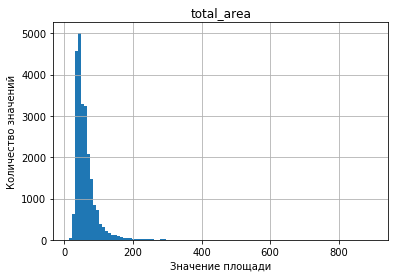

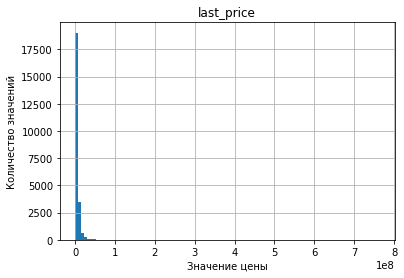

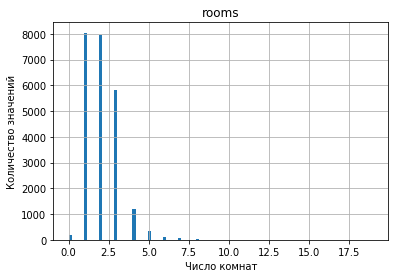

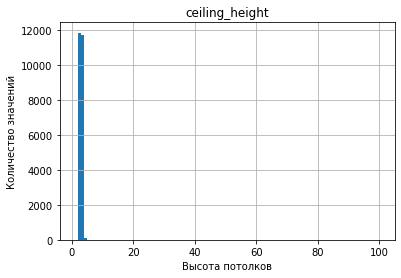

In [43]:
import matplotlib.pyplot as plt

data['total_area'].hist(bins=100) #площадь
plt.title('total_area')
plt.xlabel('Значение площади')
plt.ylabel('Количество значений')
plt.show()

data['last_price'].hist(bins=100) #цена
plt.title('last_price')
plt.xlabel('Значение цены')
plt.ylabel('Количество значений')
plt.show()

data['rooms'].hist(bins=100) #число комнат
plt.title('rooms')
plt.xlabel('Число комнат')
plt.ylabel('Количество значений')
plt.show()

data['ceiling_height'].hist(bins=100) #высота потолков
plt.title('ceiling_height')
plt.xlabel('Высота потолков')
plt.ylabel('Количество значений')
plt.show()

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

185.8217224355458
94.0


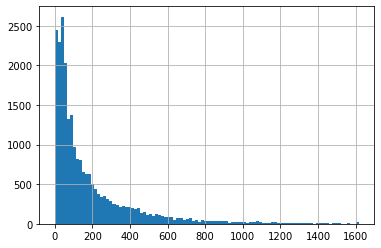

In [44]:
data['days_exposition'].hist(bins=100)

print(data['days_exposition'].mean())
print(data['days_exposition'].median())

При определении того, сколько обычно занимает продажа целесообразнее ориентироваться на медиану значений, т.е. это 94 дня.

Значения, меньше медианы по величине есть быстрые продажи, а больше - долгие: степень зависит от удаленности значения от медианы.

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

Исходя из предыдущих действий и анализов, в которых я старался максимально аккуратно относиться к данным и без причины не "браковать" результаты, редких и выбивающихся значений я не обнаружил.

Можно удалить те значения, где нет названия населенного пункта.

In [45]:
data = data.loc[~data['locality_name'].isna()]
#data.loc[data['locality_name'].isna()]
#data.info()

In [46]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_by_meter^2,month,year,living_to_total_ratio,kitchen_to_total_ratio
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,...,23650.000000,8064.000000,23650.000000,9085.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.859871,10.673784,35.811304,5.893277,10.569111,0.591712,...,0.469091,490.830729,0.590359,518.059879,185.714419,9.943225e+04,6.401564,2017.370021,0.584322,0.187334
std,5.682278,1.089640e+07,35.661808,1.078620,0.993754,6.593455,24.198233,4.883317,6.092870,0.959662,...,0.748458,342.554386,0.883539,277.841733,233.455771,5.033794e+04,3.491418,1.037806,0.121461,0.069386
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,0.000000,1.118350e+02,1.000000,2014.000000,0.022000,0.025000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,43.000000,7.661497e+04,3.000000,2017.000000,0.500000,0.137000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.950000,9.000000,30.900000,4.000000,9.050000,0.000000,...,0.000000,454.500000,0.000000,502.000000,94.000000,9.500000e+04,6.000000,2017.000000,0.581000,0.182000
75%,14.000000,6.799000e+06,69.700000,3.000000,3.000000,16.000000,43.137500,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,237.000000,1.142742e+05,10.000000,2018.000000,0.659000,0.224000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1618.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.788000


По каким столбцам целесообразно смотреть и удалять редкие и выбивающиеся значения.
- total_area (туда попадает и столбец kitchen area) - значение 900
- rooms - значение больше 15
- ceiling_height - значение 100 удаляем, так же как и значения меньше 2 метров, а в остальных значениях больше 20 метров можно предположить, что были ошибки при вводе, связанные со смещением запятых и можно значение разделить на 10

In [47]:
#total_area
#data['total_area'].value_counts().sort_index()
data = data.loc[~(data['total_area'] == 900)]

#rooms
#data['rooms'].value_counts().sort_index()
data = data.loc[~(data['rooms'] >= 15)]

#ceiling_height
#data['ceiling_height'].value_counts().sort_index()
data = data.loc[~(data['ceiling_height'] == 100)]
data = data.loc[~(data['ceiling_height'] < 2.0)]
#data = data.loc[(data['ceiling_height'] >= 20.0) / 10]
import numpy as np
data['ceiling_height'] = np.where(data.ceiling_height >= 20.0, data.ceiling_height / 10, data.ceiling_height)

data = data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23642 entries, 0 to 23641
Data columns (total 30 columns):
index                     23642 non-null int64
total_images              23642 non-null int64
last_price                23642 non-null int64
total_area                23642 non-null float64
first_day_exposition      23642 non-null datetime64[ns]
rooms                     23642 non-null int64
ceiling_height            23642 non-null float64
floors_total              23642 non-null int64
living_area               23642 non-null float64
floor                     23642 non-null int64
is_apartment              23642 non-null bool
studio                    23642 non-null bool
open_plan                 23642 non-null bool
kitchen_area              23642 non-null float64
balcony                   23642 non-null int64
locality_name             23642 non-null object
airports_nearest          18109 non-null float64
cityCenters_nearest       18132 non-null float64
parks_around3000          

Остальные значения нет причин удалять.

**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

In [48]:
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_by_meter^2,day_week,month,year,flat_floor_name,living_to_total_ratio,kitchen_to_total_ratio
0,0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,...,2,755.0,57,120370.370,Thursday,3,2019,другой,0.472,0.231
1,1,7,3350000,40.4,2018-12-04,1,3.00,11,18.600000,1,...,0,NaN,81,82920.792,Tuesday,12,2018,первый,0.460,0.272
2,2,10,5196000,56.0,2015-08-20,2,3.00,5,34.300000,4,...,2,574.0,558,92785.714,Thursday,8,2015,другой,0.612,0.148
3,3,0,64900000,159.0,2015-07-24,3,3.00,14,129.210597,9,...,3,234.0,424,408176.101,Friday,7,2015,другой,0.813,0.187
4,4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,...,1,48.0,121,100000.000,Tuesday,6,2018,другой,0.320,0.410


In [49]:
#data.info()
print('Зависимость цены от площади:', data['last_price'].corr(data['total_area']))

print('Зависимость цены от числа комнат:', data['last_price'].corr(data['rooms']))

print('Зависимость цены от удаленности от центра:', data['last_price'].corr(data['cityCenters_nearest']))

def get_floor_number(row):
    if row['flat_floor_name'] == 'первый':
        return 0
    if row['flat_floor_name'] == 'другой':
        return 1
    return 2
data['flat_floor_name_numeric'] = data.apply(get_floor_number, axis=1)
print('Зависимость цены от этажа расположения:', data['last_price'].corr(data['flat_floor_name_numeric']))

def day_week_number(row):
    if row['day_week'] == 'Monday':
        return 1
    if row['day_week'] == 'Tuesday':
        return 2
    if row['day_week'] == 'Wednesday':
        return 3
    if row['day_week'] == 'Thursday':
        return 4
    if row['day_week'] == 'Friday':
        return 5
    if row['day_week'] == 'Saturday':
        return 6
    if row['day_week'] == 'Sunday':
        return 7
data['day_week_numeric'] = data.apply(day_week_number, axis=1)
print('Зависимость цены от дня недели:', data['last_price'].corr(data['day_week_numeric']))
print('Зависимость цены от месяца:', data['last_price'].corr(data['month']))
print('Зависимость цены от года:', data['last_price'].corr(data['year']))

Зависимость цены от площади: 0.6434984453250201
Зависимость цены от числа комнат: 0.3594740174434669
Зависимость цены от удаленности от центра: -0.2119952402774472
Зависимость цены от этажа расположения: 0.05735450172532803
Зависимость цены от дня недели: 0.0020893766762062785
Зависимость цены от месяца: 0.0005824392622793204
Зависимость цены от года: -0.0440131761299835


**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

In [50]:
top10 = pd.DataFrame(data['locality_name'].value_counts().head(10))
goroda = top10.index
top10['price_by_meter_mean'] = data['locality_name'].isin(top10.index)
top10['gorod'] = data['locality_name'].isin(top10.index)

for i in range(0,10):
    top10['gorod'][i] = goroda[i]
    top10['price_by_meter_mean'][i] = round(data[data['locality_name'] == goroda[i]]['price_by_meter^2'].mean(), 1)

print(top10)    
print('Самая высокая стоимость метра квадратного жилья:', top10.loc[top10['price_by_meter_mean'] == top10['price_by_meter_mean'].max()].index[0])
print('Самая низкая стоимость метра квадратного жилья:', top10.loc[top10['price_by_meter_mean'] == top10['price_by_meter_mean'].min()].index[0])


                   locality_name price_by_meter_mean              gorod
санкт-петербург            15714              114800    санкт-петербург
посёлок мурино               522             85752.2     посёлок мурино
посёлок шушары               440             78677.4     посёлок шушары
всеволожск                   398             68654.5         всеволожск
пушкин                       369              103126             пушкин
колпино                      338             75424.6            колпино
посёлок парголово            327             90175.9  посёлок парголово
гатчина                      307             68746.1            гатчина
деревня кудрово              299             92473.5    деревня кудрово
выборг                       237             58141.9             выборг
Самая высокая стоимость метра квадратного жилья: санкт-петербург
Самая низкая стоимость метра квадратного жилья: выборг


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
top10 = data.groupby('locality_name')\
    .agg({'locality_name':'count', 'price_by_meter^2':'mean'})\
    .rename(columns={'locality_name':'count', 'price_by_meter^2':'price_by_meter_mean'})\
    .sort_values(by='count', ascending=False)[:10]

print(top10)
print('Самая высокая стоимость метра квадратного жилья:', top10.loc[top10['price_by_meter_mean'] == top10['price_by_meter_mean'].max()].index[0])
print('Самая низкая стоимость метра квадратного жилья:', top10.loc[top10['price_by_meter_mean'] == top10['price_by_meter_mean'].min()].index[0])

                   count  price_by_meter_mean
locality_name                                
санкт-петербург    15714        114799.617718
посёлок мурино       522         85752.189201
посёлок шушары       440         78677.364245
всеволожск           398         68654.474000
пушкин               369        103125.819274
колпино              338         75424.579098
посёлок парголово    327         90175.913431
гатчина              307         68746.146808
деревня кудрово      299         92473.547572
выборг               237         58141.909152
Самая высокая стоимость метра квадратного жилья: санкт-петербург
Самая низкая стоимость метра квадратного жилья: выборг


**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

Граница = 3 км от центра


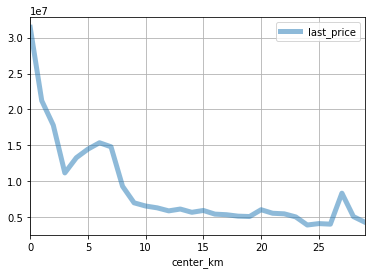

In [52]:
spb = data.loc[data['locality_name'] == 'санкт-петербург'].reset_index()
spb['center_km'] = round(spb['cityCenters_nearest'] / 1000, 0)
for_hist = pd.DataFrame(round(spb.groupby('center_km').mean(), 0))
for_hist['center_km'] = for_hist.index
for_hist.plot(x='center_km', y='last_price', linewidth=5, alpha=0.5, grid=True, legend=True)
for_hist['last_price']

print('Граница = 3 км от центра')

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [53]:
center_spb = spb.query('center_km <= 3.0')
center_spb

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,price_by_meter^2,day_week,month,year,flat_floor_name,living_to_total_ratio,kitchen_to_total_ratio,flat_floor_name_numeric,day_week_numeric,center_km
14,24,24,8,6500000,97.2,2015-10-31,2,3.00,3,46.500000,...,66872.428,Saturday,10,2015,первый,0.478,0.202,0,6,2.0
56,99,99,32,9600000,90.0,2017-09-26,4,3.00,5,67.000000,...,106666.667,Tuesday,9,2017,другой,0.744,0.089,1,2,3.0
80,138,138,8,4800000,40.0,2017-11-18,2,3.00,3,29.000000,...,120000.000,Saturday,11,2017,другой,0.725,0.150,1,6,3.0
89,154,154,1,8200000,80.0,2018-11-06,3,4.15,3,44.200000,...,102500.000,Tuesday,11,2018,другой,0.552,0.152,1,2,3.0
90,155,155,8,96000000,317.0,2017-07-07,4,3.50,3,183.000000,...,302839.117,Friday,7,2017,последний,0.577,0.187,2,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15540,23373,23430,18,5260000,38.0,2018-11-06,1,3.30,5,16.000000,...,138421.053,Tuesday,11,2018,первый,0.421,0.316,0,2,3.0
15551,23392,23449,4,6300000,52.6,2015-05-28,3,3.25,5,29.800000,...,119771.863,Thursday,5,2015,другой,0.567,0.165,1,4,3.0
15623,23498,23555,5,15350000,158.5,2019-03-07,7,2.95,7,57.400000,...,96845.426,Thursday,3,2019,последний,0.362,0.078,2,4,3.0
15657,23545,23602,0,8700000,73.0,2019-01-23,3,2.65,4,59.323104,...,119178.082,Wednesday,1,2019,последний,0.813,0.187,2,3,2.0


**Анализ территории**

In [54]:
# общий анализ
center_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 14 to 15684
Data columns (total 34 columns):
level_0                    879 non-null int64
index                      879 non-null int64
total_images               879 non-null int64
last_price                 879 non-null int64
total_area                 879 non-null float64
first_day_exposition       879 non-null datetime64[ns]
rooms                      879 non-null int64
ceiling_height             879 non-null float64
floors_total               879 non-null int64
living_area                879 non-null float64
floor                      879 non-null int64
is_apartment               879 non-null bool
studio                     879 non-null bool
open_plan                  879 non-null bool
kitchen_area               879 non-null float64
balcony                    879 non-null int64
locality_name              879 non-null object
airports_nearest           879 non-null float64
cityCenters_nearest        879 non-null float64

Всего вышло 879 значений.

Предобработка данных была проведена на предыдущих этапах, не хватает значений только в столбцах "ponds_nearest" и "parks_nearest.

In [55]:
# площадь
center_spb['total_area'].value_counts().sort_index()

12.0     1
13.0     1
16.0     1
17.6     1
20.0     1
        ..
365.0    1
400.0    1
401.0    1
483.9    1
517.0    1
Name: total_area, Length: 482, dtype: int64

Диапазон значений от 12 до 517 метров квадратных.

In [56]:
# цена
center_spb['last_price'].value_counts().sort_index()

2100000      1
2385000      1
2400000      1
2645000      1
2750000      1
            ..
159984000    1
160000000    1
289238400    1
330000000    1
401300000    1
Name: last_price, Length: 393, dtype: int64

In [57]:
# число комнат
center_spb['rooms'].value_counts().sort_index()

0       4
1      71
2     257
3     268
4     152
5      72
6      29
7      18
8       4
9       1
11      2
14      1
Name: rooms, dtype: int64

Диапазон значений от 0 до 14. 

In [58]:
# высота потолков
center_spb['ceiling_height'].value_counts().sort_index()

2.50    16
2.55     1
2.60     7
2.63     1
2.65     3
        ..
4.30     1
4.50     1
4.80     1
4.90     1
5.80     1
Name: ceiling_height, Length: 100, dtype: int64

Диапазон значений от 2.50 до 5.80.

**Исследование зависимости факторов на цену квартир в центре СПБ**

In [59]:
print('Зависимость цены от площади:', center_spb['last_price'].corr(center_spb['total_area']))

print('Зависимость цены от числа комнат:', center_spb['last_price'].corr(center_spb['rooms']))

print('Зависимость цены от удаленности от центра:', center_spb['last_price'].corr(center_spb['cityCenters_nearest']))

center_spb['flat_floor_name_numeric'] = center_spb.apply(get_floor_number, axis=1)
print('Зависимость цены от этажа расположения:', center_spb['last_price'].corr(center_spb['flat_floor_name_numeric']))

center_spb['day_week_numeric'] = center_spb.apply(day_week_number, axis=1)
print('Зависимость цены от дня недели:', center_spb['last_price'].corr(center_spb['day_week_numeric']))
print('Зависимость цены от месяца:', center_spb['last_price'].corr(center_spb['month']))
print('Зависимость цены от года:', center_spb['last_price'].corr(center_spb['year']))

Зависимость цены от площади: 0.5655769813834898
Зависимость цены от числа комнат: 0.24034924577796654
Зависимость цены от удаленности от центра: -0.16465623733396156
Зависимость цены от этажа расположения: 0.07410066755374864
Зависимость цены от дня недели: -0.005725215192188741
Зависимость цены от месяца: -0.020949702599692744
Зависимость цены от года: -0.02495864438484268


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


**Значения по всему городу**

Зависимость цены от площади: 0.6537428966335397

Зависимость цены от числа комнат: 0.36342062218770693

Зависимость цены от удаленности от центра: -0.20688702501498762

Зависимость цены от этажа расположения: 0.058804035144067006

Зависимость цены от дня недели: 0.0016068614793023986

Зависимость цены от месяца: 0.002741029419924221

Зависимость цены от года: -0.04292705107683146

**Вывод**

Наблюдается чуть меньшая зависимость цены от площади и чуть меньшая зависимость от удаленности от центра (логично, так как квартиры и так в центре).

В остальном данные существенно не отличаются.

## Общий вывод

Предоставленные данные для анализа подверглись предобработке и исследовательскому анализу, в ходе которого было:

1) Изучено среднее время продажи квартиры (94 дня)

2) Определены и изучены факторы, влияющие на стоимость квартиры (в основном цена зависит от площади и числа комнат)

3) Было выяснено, какая область входит в центр (круг с радиусом в 7 км от центра города)

4) Проанализирован сегмент квартир в центре города, и сделан вывод о том, что, в целом, данные соответствуют данным по всему городу с наименьшим влияние такого фактора, как расстояние от центра.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод